In [118]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import gdown

%matplotlib inline

In [119]:
sns.set(
    font_scale = 1,
    style = 'whitegrid',
    rc={'figure.figsize': (15, 5)}
)

In [120]:
# https://drive.google.com/file/d/1iYD14md93AiTaFYN9CaOxItT9eBR3hfx/view?usp=drive_link
df = pd.read_csv("../data/1 games.csv") 

In [121]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [122]:
df = df.dropna()
df.Year = df.Year.astype(np.int64)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [124]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Задание 1
## Построить распределение кол-ва выпущенных игр по годам

In [125]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [137]:
df.Year.mode()

0    2009
Name: Year, dtype: int64

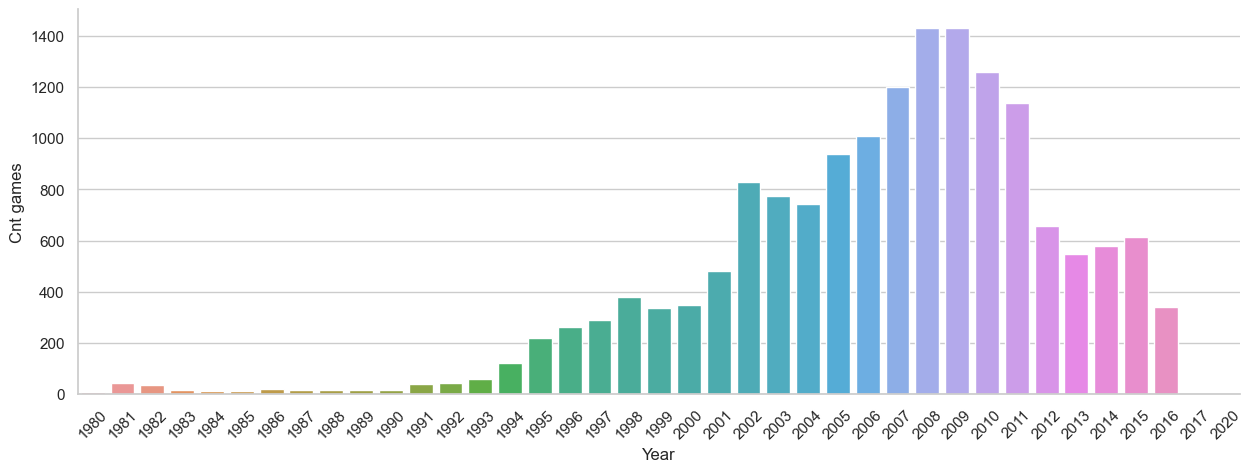

In [126]:
sns.countplot(x = df.Year)
plt.xticks(rotation = 45)
plt.ylabel('Cnt games')
sns.despine()

# Задание 2
## Определить платформы с наибольшим кол-вом релизов

In [143]:
# Записать про параметр 
# value_counts(normalize=True)
# И про метод to_frame

In [149]:
df_platforms = df.Platform.value_counts(normalize=True).mul(100).to_frame('percetnage')

In [153]:
df_platforms[df_platforms.percetnage > 7]

,percetnage
Platform,
DS,13.080842
PS2,13.056289
PS3,8.004420
Wii,7.918483
X360,7.574735
PSP,7.347615
PS,7.298508


# Задание 3
## Определить моду по полю Publisher (Издатель)

In [128]:
df.Publisher.mode()

0    Electronic Arts
Name: Publisher, dtype: object

In [158]:
df.Publisher.value_counts().head()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: count, dtype: int64

# Задание 4
## Определить медианное значение продаж Nintendo по регионам и вывести наибольшее

In [130]:
# Подумать ещё раз
df[df.Publisher == 'Nintendo'] \
    .groupby('Publisher') \
    .agg(
        NA_Sales_med    = ('NA_Sales', 'median'),
        EU_Sales_med    = ('EU_Sales', 'median'),
        JP_Sales_med    = ('JP_Sales', 'median'),
        Other_Sales_med = ('Other_Sales', 'median'),
    ) \
    .reset_index()

,Publisher,NA_Sales_med,EU_Sales_med,JP_Sales_med,Other_Sales_med
0,Nintendo,0.375,0.12,0.28,0.03


In [159]:
df[df.Publisher == 'Nintendo'].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Задание 5
## Изучить объемы продаж в Японии по жанрам издателя Nintendo

In [132]:
from scipy.stats import iqr

df[df.Publisher == 'Nintendo']\
    .groupby('Genre') \
    .agg(
        median = ('JP_Sales', 'median'),
        mean   = ('JP_Sales', 'mean'),
        var    = ('JP_Sales', 'var'),
        iqr    = ('JP_Sales', iqr),
        max    = ('JP_Sales', 'max'),
        min    = ('JP_Sales', 'min'),
    ) \
    .sort_values('median', ascending=False)

,median,mean,var,iqr,max,min
Genre,,,,,,
Platform,0.540,0.922162,1.396017,0.8550,6.81,0.0
Fighting,0.500,0.830000,0.711541,1.2325,2.66,0.0
Simulation,0.390,0.844643,1.611463,0.8950,5.33,0.0
Role-Playing,0.360,0.970952,2.762113,0.5800,10.22,0.0
Racing,0.340,0.789730,1.283042,0.7900,4.13,0.0
Puzzle,0.255,0.501216,0.698770,0.5225,5.32,0.0
Misc,0.250,0.552500,0.618364,0.6800,4.16,0.0
Sports,0.250,0.652182,0.899595,0.6550,3.77,0.0
Strategy,0.190,0.337419,0.161933,0.3850,1.38,0.0


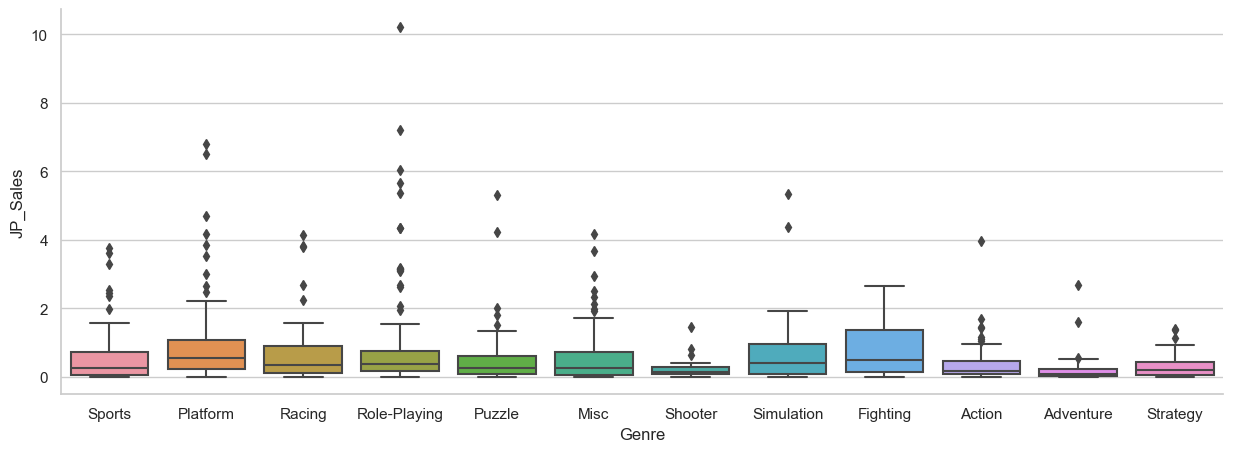

In [162]:
# Почитать про боксплот
sns.boxplot(df[df.Publisher == 'Nintendo'], x='Genre', y='JP_Sales')
sns.despine()

# Задание 6
## Визуализировать динимику изменения объема мировых продаж Nintendo для игр определенных жанров

In [169]:
df_sales_nintendo = df[(df.Publisher == 'Nintendo') & (df.Genre.isin(['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']))] \
                    .groupby(['Year', 'Genre']) \
                    .agg(Global_Sales = ('Global_Sales', 'sum')) \
                    .reset_index()

e:\Users\burmos_aa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Users\burmos_aa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


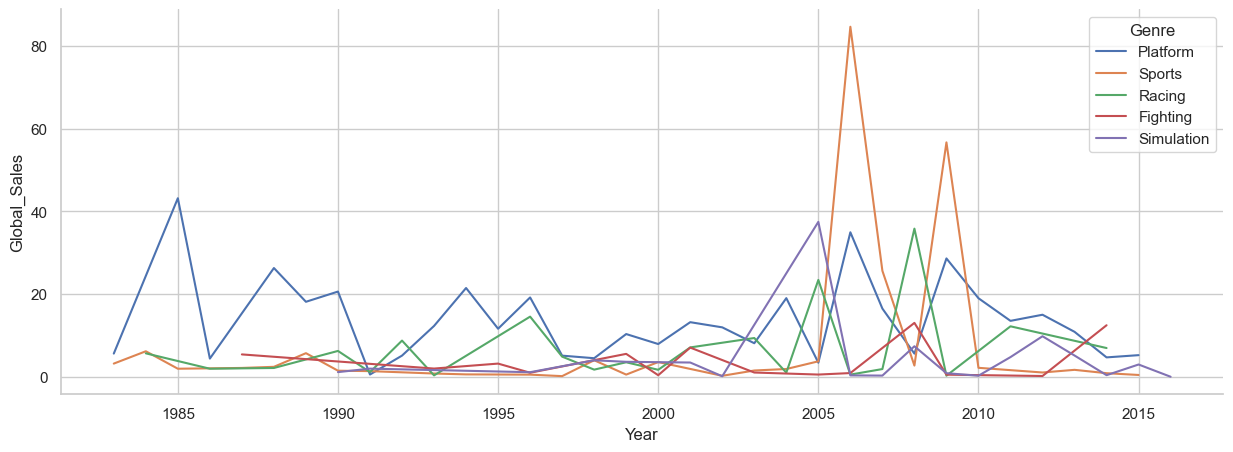

In [170]:
sns.lineplot(df_sales_nintendo, x='Year', y='Global_Sales', hue='Genre')
sns.despine()

In [171]:
df_sales = df[(df.Genre.isin(['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']))] \
                    .groupby(['Year', 'Genre']) \
                    .agg(Global_Sales = ('Global_Sales', 'sum')) \
                    .reset_index()

e:\Users\burmos_aa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Users\burmos_aa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


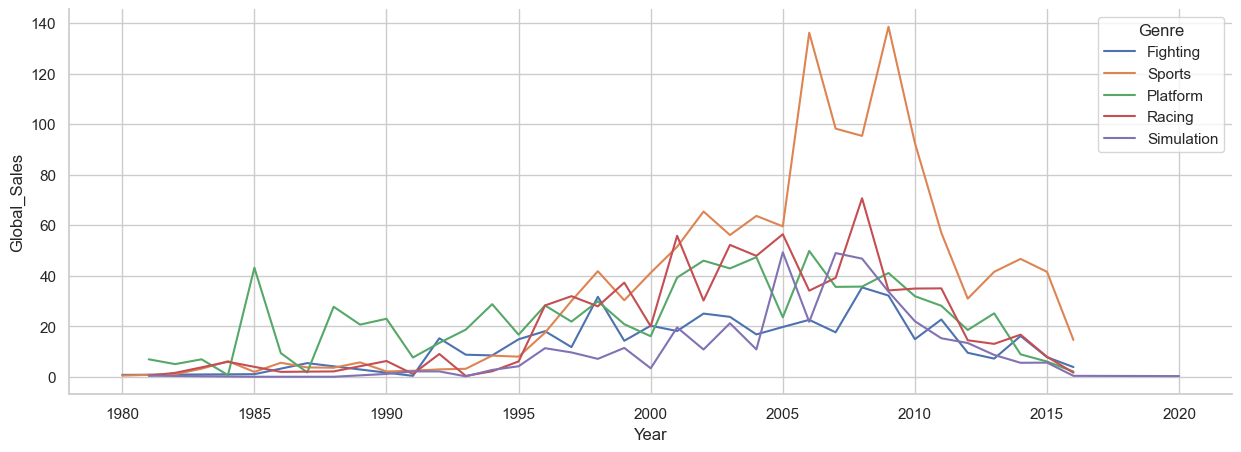

In [172]:
sns.lineplot(df_sales, x='Year', y='Global_Sales', hue='Genre')
sns.despine()